In [1]:
from google.colab import drive # loads a library to mount your google drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv>=2.0.0rc4"

# Install mmdetection
!rm -rf mmdetection
!git clone https://github.com/open-mmlab/mmdetection.git
%cd mmdetection

!pip install -e .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.4/307.4 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.9/143.9 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.7/451.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 30.5 MB/s eta 0:00:00
Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.3.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 MB 8.2 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 38019, done.
remote: Total 38019 (delta 0), reused 0 (delta 0), pack-reused 38019
Receiving objects: 100% (38019/38019), 63.18 MiB | 13.35 MiB/s, done.
Resolving deltas: 100% (26232/26232), done.
/content/mmdetection
Obtaining file:///content/mmdetection
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmdet


In [2]:
# Check Pytorch installation
import torch, torchvision
print("torch version:",torch.__version__, "cuda:",torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print("mmdetection:",mmdet.__version__)

# Check mmcv installation
import mmcv
print("mmcv:",mmcv.__version__)

# Check mmengine installation
import mmengine
print("mmengine:",mmengine.__version__)

torch version: 2.3.0+cu121 cuda: True
mmdetection: 3.3.0
mmcv: 2.2.0
mmengine: 0.10.4


In [3]:
from mmengine import Config
cfg = Config.fromfile('/content/drive/MyDrive/Trash_Can/trash_can_model/mask-rcnn_r50_fpn_2x_coco_trash_can.py')

In [ ]:
import mmcv
from mmdet.apis import init_detector, inference_detector
checkpoint_file = '/content/drive/MyDrive/Trash_Can/trash_can_model/epoch_4.pth'
model = init_detector(cfg, checkpoint_file, device='cpu')

In [34]:
img = mmcv.imread('/content/drive/MyDrive/Trash_Can/test/vid_000053_frame0000018.jpg',channel_order='rgb')
new_result = inference_detector(model, img)
print(new_result)

<DetDataSample(

    META INFORMATION
    img_shape: (750, 1333)
    batch_input_shape: (768, 1344)
    img_path: None
    img_id: 0
    pad_shape: (768, 1344)
    ori_shape: (270, 480)
    scale_factor: (2.777083333333333, 2.7777777777777777)

    DATA FIELDS
    pred_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            bboxes: tensor([[ 85.4156, 146.7115, 117.4648, 184.0089],
                        [304.2506, 119.1703, 408.7497, 267.9591],
                        [190.2634, 110.4839, 212.2467, 131.9838],
                        [ 97.8096,  51.4528, 125.3199,  79.6962],
                        [  0.0000,   0.0000, 109.1742, 270.0000],
                        [138.4948,  80.3317, 219.5521, 193.0237],
                        [130.9987, 164.1917, 164.9751, 195.2446],
                        [157.5059, 173.3135, 175.0819, 189.7734],
                        [295.7667,   0.0000, 322.4536,  24.8290],
                        [138.1350, 

In [40]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import numpy as np
from pycocotools.coco import COCO
from skimage.measure import find_contours
from PIL import Image
import colorsys
import json

In [8]:
def imshow_masks(img, masks, alpha=0.5, show=True, win_name='', wait_time=0, out_file=None):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.imshow(masks, alpha=alpha)
    if show:
        plt.show(block=False)
        plt.pause(wait_time)
        plt.close()
    if out_file is not None:
        plt.savefig(out_file)
    return img

def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors


def apply_mask(image, mask, color, alpha=0.5):
    """Apply the given mask to the image.
    """
    for c in range(3):
        image[:, :, c] = np.where(mask == 1,
                                  image[:, :, c] *
                                  (1 - alpha) + alpha * color[c] * 255,
                                  image[:, :, c])
    return image

def display_instances(image, boxes, masks, class_ids, class_names,
                      scores=None, title="",
                      figsize=(16, 8), ax=None,
                      show_mask=True, show_bbox=True,
                      colors=None, captions=None, save_path=None):
    """
    boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
    masks: [height, width, num_instances]
    class_ids: [num_instances]
    class_names: list of class names of the dataset
    scores: (optional) confidence scores for each box
    title: (optional) Figure title
    show_mask, show_bbox: To show masks and bounding boxes or not
    figsize: (optional) the size of the image
    colors: (optional) An array or colors to use with each object
    captions: (optional) A list of strings to use as captions for each object
    """
    # Number of instances
    N = boxes.shape[0]
    if not N:
        print("\n*** No instances to display *** \n")
    else:
        assert boxes.shape[0] == masks.shape[-1] == class_ids.shape[0]

    # If no axis is passed, create one and automatically call show()
    auto_show = False
    if not ax:
        _, ax = plt.subplots(1, figsize=figsize)
        auto_show = True

    # Generate random colors
    colors = colors or random_colors(N)

    # Show area outside image boundaries.
    height, width = image.shape[:2]
    ax.set_ylim(height + 10, -10)
    ax.set_xlim(-10, width + 10)
    ax.axis('off')
    ax.set_title(title)

    masked_image = image.astype(np.uint32).copy()
    for i in range(N):
        color = colors[i]

        # Bounding box
        if not np.any(boxes[i]):
            # Skip this instance. Has no bbox. Likely lost in image cropping.
            continue
        x1, y1, x2,y2 = boxes[i]
        if show_bbox:
            p = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2,
                                alpha=0.7, linestyle="dashed",
                                edgecolor=color, facecolor='none')
            ax.add_patch(p)

        # Label
        if not captions:
            class_id = class_ids[i]
            score = scores[i] if scores is not None else None
            label = class_names[class_id]
            caption = "{} {:.3f}".format(label, score) if score else label
        else:
            caption = captions[i]
        ax.text(x1, y1 + 8, caption,
                color='w', size=11, backgroundcolor="none")

        # Mask
        mask = masks[:, :, i]
        if show_mask:
            masked_image = apply_mask(masked_image, mask, color)

        # Mask Polygon
        # Pad to ensure proper polygons for masks that touch image edges.
        padded_mask = np.zeros(
            (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
        padded_mask[1:-1, 1:-1] = mask
        contours = find_contours(padded_mask, 0.5)
        for verts in contours:
            # Subtract the padding and flip (y, x) to (x, y)
            verts = np.fliplr(verts) - 1
            p = Polygon(verts, facecolor="none", edgecolor=color)
            ax.add_patch(p)
    ax.imshow(masked_image.astype(np.uint8))

    if save_path: plt.savefig(save_path, bbox_inches='tight')
    plt.show()
    plt.close()

    if auto_show:
        pass


In [35]:
bboxs=new_result.pred_instances.bboxes.numpy()
scorings=new_result.pred_instances.scores.numpy()
labls=new_result.pred_instances.labels.numpy()
maskss=new_result.pred_instances.masks.numpy()
maskss = maskss.transpose(1, 2, 0)



In [10]:
classes= [
        'rov',
        'plant',
        'animal_fish',
        'animal_starfish',
        'animal_shells',
        'animal_crab',
        'animal_eel',
        'animal_etc',
        'trash_clothing',
        'trash_pipe',
        'trash_bottle',
        'trash_bag',
        'trash_snack_wrapper',
        'trash_can',
        'trash_cup',
        'trash_container',
        'trash_unknown_instance',
        'trash_branch',
        'trash_wreckage',
        'trash_tarp',
        'trash_rope',
        'trash_net'
]

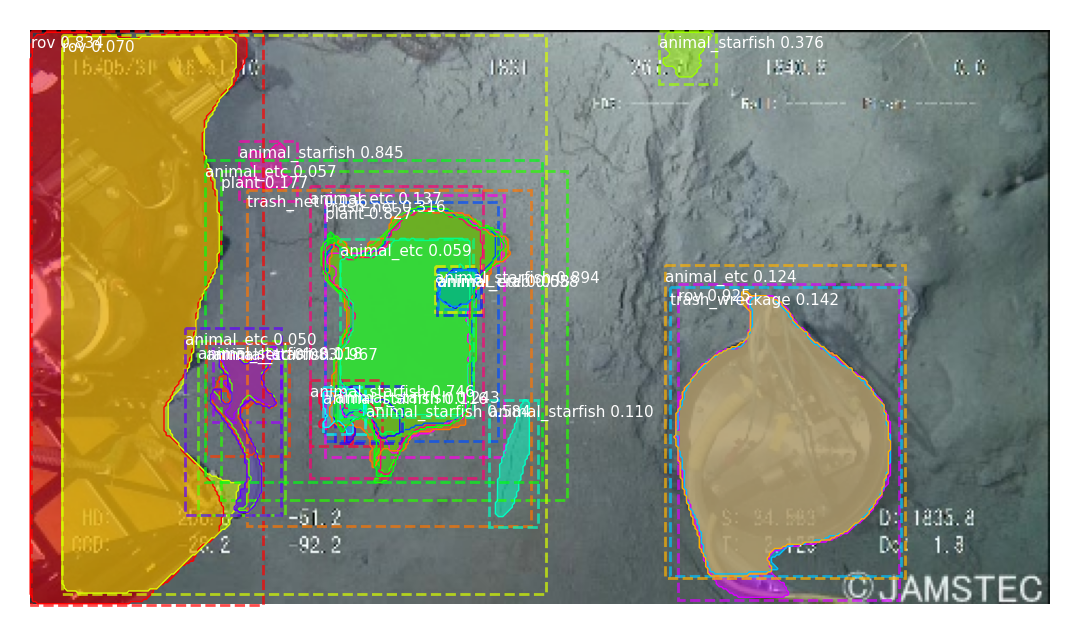

In [36]:
display_instances(img,bboxs,maskss,labls,classes,scores=scorings)

In [37]:
threshold=0.75
masky = scorings > threshold
filtered_bbox = bboxs[masky]
filtered_masks = maskss[:, :, masky]
filtered_labels = labls[masky]
filtered_scores = scorings[masky]

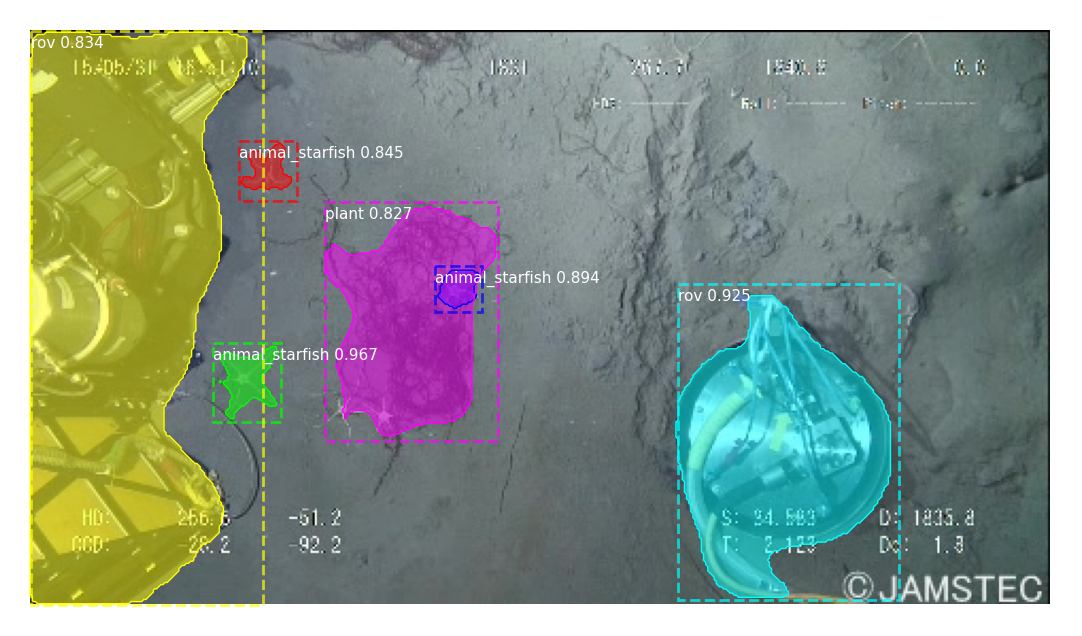

In [38]:
display_instances(img,filtered_bbox,filtered_masks,filtered_labels,classes,scores=scorings)

In [39]:
S_box=[]
S_mask=[]
S_labels=[]
S_names=[]

In [41]:
img_folder = '/content/drive/MyDrive/Trash_Can/test'
imgs = os.listdir(img_folder)

for img_name in imgs:
    img_path = os.path.join(img_folder, img_name)
    img = mmcv.imread(img_path, channel_order='rgb')
    new_result = inference_detector(model, img)
    bboxs=new_result.pred_instances.bboxes.numpy()
    scorings=new_result.pred_instances.scores.numpy()
    labls=new_result.pred_instances.labels.numpy()
    maskss=new_result.pred_instances.masks.numpy()
    maskss = maskss.transpose(1, 2, 0)
    threshold=0.75
    masky = scorings > threshold
    filtered_bbox = bboxs[masky]
    filtered_masks = maskss[:, :, masky]
    filtered_labels = labls[masky]
    filtered_scores = scorings[masky]
    S_box.append(filtered_bbox)
    S_mask.append(filtered_masks)
    S_labels.append(filtered_labels)
    S_names.append(img_path)

In [42]:
def create_coco_format_jsons(boxes, class_ids, class_names, masks, filepaths):
    class_names_use = [i for i in class_names if i != 'BG']
    my_dict = {i + 1: name for i, name in enumerate(class_names_use)}

    images = []
    annotations = []
    categories = []
    count = 0
    for i, name in enumerate(class_names_use):
        categories.append({
            "id": i + 1,
            "name": name
        })

    for i in range(len(boxes)):
        N = boxes[i].shape[0]
        for j in range(N):
            box = boxes[i][j]
            mask = masks[i][:, :, j]
            class_id = class_ids[i][j]
            filename = os.path.basename(filepaths[i])
            images.append({
                "id": filename,
                "width": mask.shape[1],
                "height": mask.shape[0],
                "file_name": filename
            })
            y1, x1, y2, x2 = box
            label = 1
            maker = mask.astype('int')
            padded_mask = np.zeros(
                (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
            padded_mask[1:-1, 1:-1] = mask
            contours = find_contours(padded_mask, 0.5)
            for verts in contours:
                verts = np.fliplr(verts) - 1
                seg = {
                    'segmentation': verts,
                    'bbox': [int(x1), int(y1), int(x2 - x1 + 1), int(y2 - y1 + 1)],
                    'area': int(np.sum(mask)),
                    'image_id': filename,
                    #'category_id': my_dict.get(label),
                    'category_id': my_dict.get(label),
                    'iscrowd': 0,
                    'id': count
                }
                annotations.append(seg)
                count += 1

    dataset_coco_format = {
        "categories": categories,
        "images": images,
        "annotations": annotations,
    }

    return dataset_coco_format

In [43]:
classes_N= ['BG',
        'rov',
        'plant',
        'animal_fish',
        'animal_starfish',
        'animal_shells',
        'animal_crab',
        'animal_eel',
        'animal_etc',
        'trash_clothing',
        'trash_pipe',
        'trash_bottle',
        'trash_bag',
        'trash_snack_wrapper',
        'trash_can',
        'trash_cup',
        'trash_container',
        'trash_unknown_instance',
        'trash_branch',
        'trash_wreckage',
        'trash_tarp',
        'trash_rope',
        'trash_net'
]

In [44]:
data_1=create_coco_format_jsons(S_box,S_labels,class_names=classes_N,masks=S_mask,filepaths=S_names)

In [45]:
class CocoEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [46]:
dumped = json.dumps(data_1, cls=CocoEncoder)
with open('/content/drive/MyDrive/Trash_Can/annotations/from_model.json', 'a') as outfile:
    outfile.write(dumped)